In [2]:
# Part 1 Building the CNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

# Images Dimensions
img_width, img_height = 100, 100
train_data_dir = 'mydata/training_set'
test_data_dir = 'mydata/test_set'

# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Conv2D(32, (3, 3), activation = "relu", input_shape = (100, 100, 3)))
# Parameter pertama (32) adalah nilai filter nya
# Parameter kedua adalah dimensi filter nya (3×3)
# Parameter ketiga adalah fungsi aktivasi yang kita gunakan (relu)
# Parameter keempat self explained yaitu bentuk input nya dan tipe nya (RGB atau Black/white)

# Step 2 - Pooling, Pooling bertujuan untuk mereduksi ukuran gambar
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Conv2D(32, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding 3rd Concolution Layer
classifier.add(Conv2D(64, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size =(2,2)))


# Step 3 - Flattening
# Data pooling yang kita miliki berupa array 2 dimensi kemudian dikonversi menjadi data satu dimensi single vector
classifier.add(Flatten())

# Step 4 - Full Connection
# Dense adalah fungsi untuk menambahkan layer yang fully connected.
# Parameter 1 (units) menandakan jumlah node yang harus ada di hidden layer, nilainya antara jumlah input node dan output node
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = "softmax"))

# Compiling The CNN,optimizer yang digunakan Stochastic Gradient Descent dengan learning rate 0.01 
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

Using TensorFlow backend.


Found 23400 images belonging to 26 classes.
Found 2600 images belonging to 26 classes.


In [3]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=960,
        epochs=8,
        validation_data = test_set,
        validation_steps = 2600 
      )

# Saving the model
import h5py
classifier.save('Trained_model_bisindo2.h5')

print(model.history.keys())

Epoch 1/8
960/960 [==============================] - 803s 837ms/step - loss: 0.9961 - acc: 0.7081 - val_loss: 0.2170 - val_acc: 0.9320
Epoch 2/8
960/960 [==============================] - 223s 232ms/step - loss: 0.2285 - acc: 0.9320 - val_loss: 0.1771 - val_acc: 0.9558
Epoch 3/8
960/960 [==============================] - 227s 237ms/step - loss: 0.1471 - acc: 0.9566 - val_loss: 0.1309 - val_acc: 0.9696
Epoch 4/8
960/960 [==============================] - 225s 235ms/step - loss: 0.1046 - acc: 0.9698 - val_loss: 0.1210 - val_acc: 0.9719
Epoch 5/8
960/960 [==============================] - 227s 237ms/step - loss: 0.0865 - acc: 0.9736 - val_loss: 0.1122 - val_acc: 0.9762
Epoch 6/8
960/960 [==============================] - 229s 239ms/step - loss: 0.0696 - acc: 0.9790 - val_loss: 0.1218 - val_acc: 0.9723
Epoch 7/8
960/960 [==============================] - 229s 238ms/step - loss: 0.0591 - acc: 0.9817 - val_loss: 0.0979 - val_acc: 0.9777
Epoch 8/8
960/960 [==============================] - 23

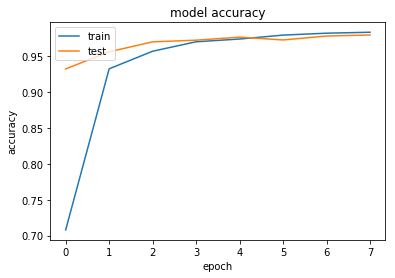

In [5]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

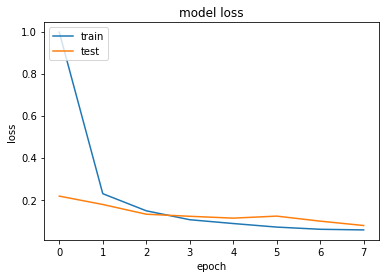

In [6]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()